<a href="https://colab.research.google.com/github/amilafr/algo-python-pro2/blob/main/M3L2_Data_grouping_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data grouping methods

Grouping is a method of processing data in which data is combined into groups based on one or more characteristics.


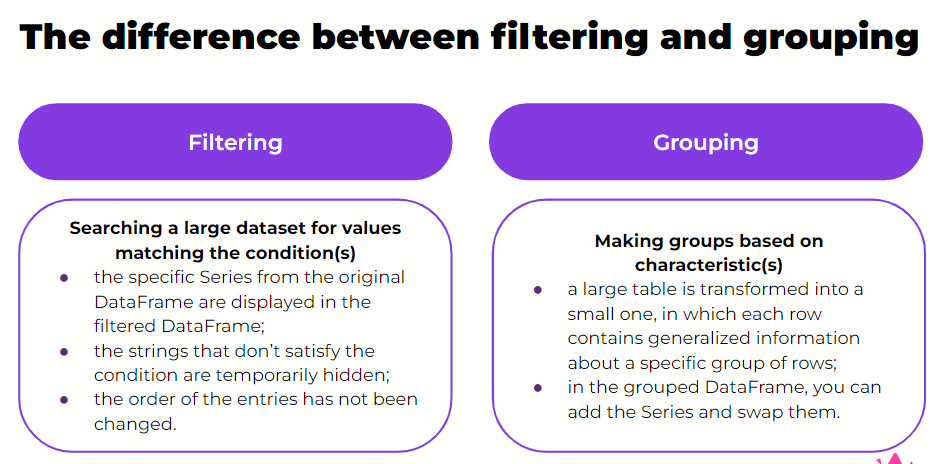

## value_counts()

The value_counts() method calculates the number of unique values for a characteristic in a column. The method returns the Series object containing unique values of characteristics and the number of rows in the DataFrame with each value.


In [3]:
import pandas as pd

df = pd.read_csv("GoogleApps.csv")

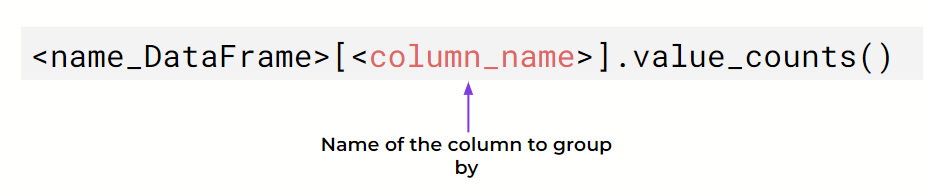

In [6]:
# grouping --> mengelompokkan data berdasarkan content rating
df['Content Rating'].value_counts()

Content Rating
Everyone        6166
Teen             868
Everyone 10+     318
Name: count, dtype: int64

In [7]:
print(df['Content Rating'].value_counts())

Content Rating
Everyone        6166
Teen             868
Everyone 10+     318
Name: count, dtype: int64


## Tasks

### 1. Calculate how many times the number of apps for the “all users” audience exceeds the number of apps for the “10+” users using the value_counts() method.

In [10]:
'''
Calculate how many more apps there are for all users
than there are for the “10+” users.

Everyone ➜ the number of apps for all users,
Everyone_10 ➜ the number of apps for users 10+.
'''

# disimpan dalam variabel temp
temp = df['Content Rating'].value_counts()

# print untuk everyone users
print(temp['Everyone'])

6166


In [11]:
everyone = temp['Everyone']
everyone_10 = temp['Everyone 10+']

# hasil
print(everyone / everyone_10)

19.38993710691824


### 2. What is the average app size for each target audience?

The **groupby()** method lets us group data by one or more characteristics and calculate the necessary statistics for the grouped data.

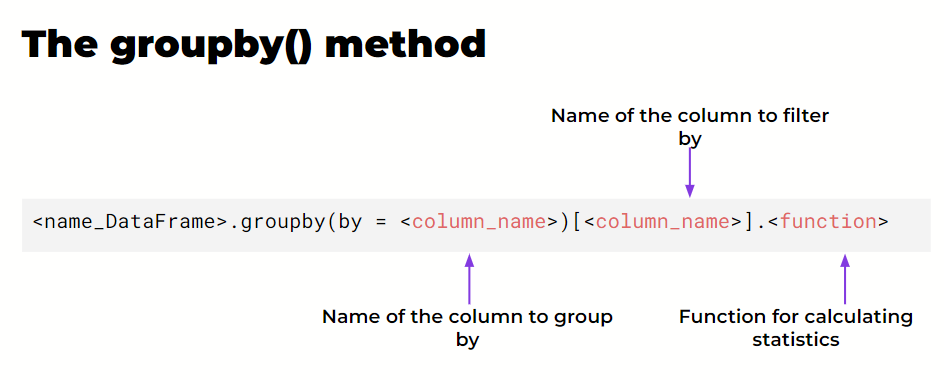

In [13]:
# rata2 app size tiap kategori target audience (content rating)
df.groupby(by = 'Content Rating')['Size'].mean()

Content Rating
Everyone        20.397063
Everyone 10+    40.733419
Teen            33.041953
Name: Size, dtype: float64

### 3. What are the minimum and maximum sizes of the paid and free apps for each target audience?

The **aggregate()** method (abbreviated as agg()) allows us to apply multiple functions to the grouped data at once to calculate statistics. As a parameter, this method takes a list of function names in the form of string constants.


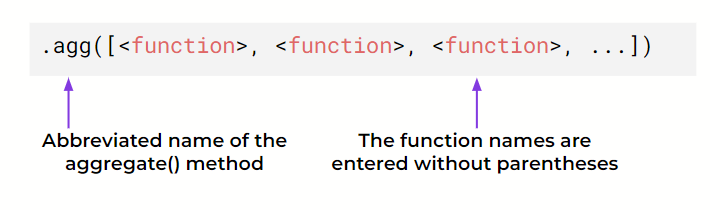

In [14]:
df.groupby(by = 'Type')['Size'].agg(['min', 'max'])

,min,max
Type,,
Free,0.008301,100.0
Paid,0.013672,100.0


In [15]:
print(df.groupby(by = 'Type')['Size'].agg(['min', 'max']))

           min    max
Type                 
Free  0.008301  100.0
Paid  0.013672  100.0


# Grouping data by multiple characteristics